1. Implement a simulation of the k-ardmed bandits environment with a variable value of k and a random p_i probabilities to obtain a reward of 0 or 1 from pulling each machine. Probabilities should be different each time you instance the environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
class Bandit:
    def __init__(self, num_bandits, bandit_probs):
        self.k = num_bandits # Number of probabilities
        self.probs = bandit_probs       
        
    def get_reward(self,action):
        p_i = np.round(np.random.random(),2)
        reward = 1 if (p_i < self.probs[action]) else 0
#         print(' Reward calculated')
        return reward


In [3]:
class Agent:
    def __init__(self, bandit, epsilon):
        # epsilon to control the type of agent (Explorer or greedy)
        self.epsilon = epsilon
        # number of times action was chosen
        self.n_actions = np.zeros(bandit.k, dtype=np.int) 
        # Estimated values? of what?
        self.Q = np.zeros(bandit.k, dtype=np.float)
    
    # Update Q action-value based on the formula
    # Q(a) = Q(a) + 1/(k+1) * (r(a) - Q(a))
    def update_Q(self, action, reward):
        self.n_actions[action] += 1
        self.Q[action] += (1/self.n_actions[action]) * (reward - self.Q[action])
        
    def choose_action(self, bandit, force_explore=False):
        rand = np.round(np.random.random(),2)
#         print(' rand: ', rand)
        if (rand < self.epsilon) or force_explore:
#             print(' I wanna explore')
            action_explore = np.random.randint(bandit.k) #Explore random bandits?
            return action_explore
        else:
#             print(' I wanna stay')
#             print(' Q', self.Q)
#             print(' Q_max:', self.Q.max())
#             print (' flat: ',np.flatnonzero(self.Q == self.Q.max()))
            action_greedy = np.random.choice(np.flatnonzero(self.Q == self.Q.max()))
            return action_greedy       

In [10]:
def experiment(agent, bandit, N_episodes):
        action_history = []
        reward_history = []
        reward_per_bandit = np.zeros(bandit.k, dtype=np.float)
        
        for episode in range(N_episodes):
            # Choose action from agent 
            action = agent.choose_action(bandit)
#             print(' Corresponding action: ', action)
            reward = bandit.get_reward(action)
            reward_per_bandit[action] += reward
#             print(' r: ', reward)
            agent.update_Q(action, reward)
            action_history.append(action)
            reward_history.append(reward)
        return np.array(action_history), np.array(reward_history), reward_per_bandit

In [13]:
# --------------------- 
#  k-bandit simulation           
# --------------------- 

# number of bandits
num_bandits = 10
epsilon = 0.1
n_episodes = 10000
n_experiments = 20

print(' Running bandits experiment with {} bandits and agent with epsilon of {}'.format(num_bandits, epsilon))

reward_history_avg = np.zeros(n_episodes)
action_history_sum = np.zeros((n_episodes, num_bandits))

bandit_probs = [ np.round(np.random.rand(),2) for i in range(num_bandits)]

best_bandit = np.argmax(bandit_probs)
print(' Probabilities calculated', bandit_probs)
print(' Best bandit is ', best_bandit+1)

# for ex in range(n_experiments):
# --------------------- 
#  Single experiment         
# ---------------------
bandit = Bandit(num_bandits,bandit_probs) # Initialize bandits
agent = Agent(bandit, epsilon) # Initialize agents

action_history, reward_history, reward_per_bandit = experiment(agent, bandit, n_episodes)

#     print(' Action history: ', action_history)

    # Sum up experiment reward 
reward_history_avg += reward_history
# print(' Reward history avg: ', reward_history_avg)

    # Sum up action history
for episodes_idx, (a) in enumerate(action_history): 
    action_history_sum[episodes_idx][a] += 1
    
# reward_history_avg /= np.float(n_experiments)

# print(' reward history avg = {}'.format(reward_history_avg))

expected_reward = np.round(reward_per_bandit/agent.n_actions,2)

print(' Action of last episode = {}'.format(action_history_sum[-1,:]))

print(' Total rewards per bandit = {}'.format(reward_per_bandit))

print(' Number of actions activated = {}'.format(agent.n_actions))

print(' Expected reward for pulling each arm = {}'.format(expected_reward))

best_found_bandit = np.argmax(expected_reward)+1
print(' Best bandit found is {}'.format(best_found_bandit))

 Running bandits experiment with 10 bandits and agent with epsilon of 0.1
 Probabilities calculated [0.99, 0.38, 0.81, 0.69, 0.34, 0.53, 1.0, 0.22, 0.61, 0.96]
 Best bandit is  7
 Action of last episode = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 Total rewards per bandit = [ 117.   42.   65.   65.   32.   72. 9058.   17.   57.  123.]
 Number of actions activated = [ 119  100   85   92   89  118 9089   91   90  127]
 Expected reward for pulling each arm = [0.98 0.42 0.76 0.71 0.36 0.61 1.   0.19 0.63 0.97]
 Best bandit found is 7


In [41]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

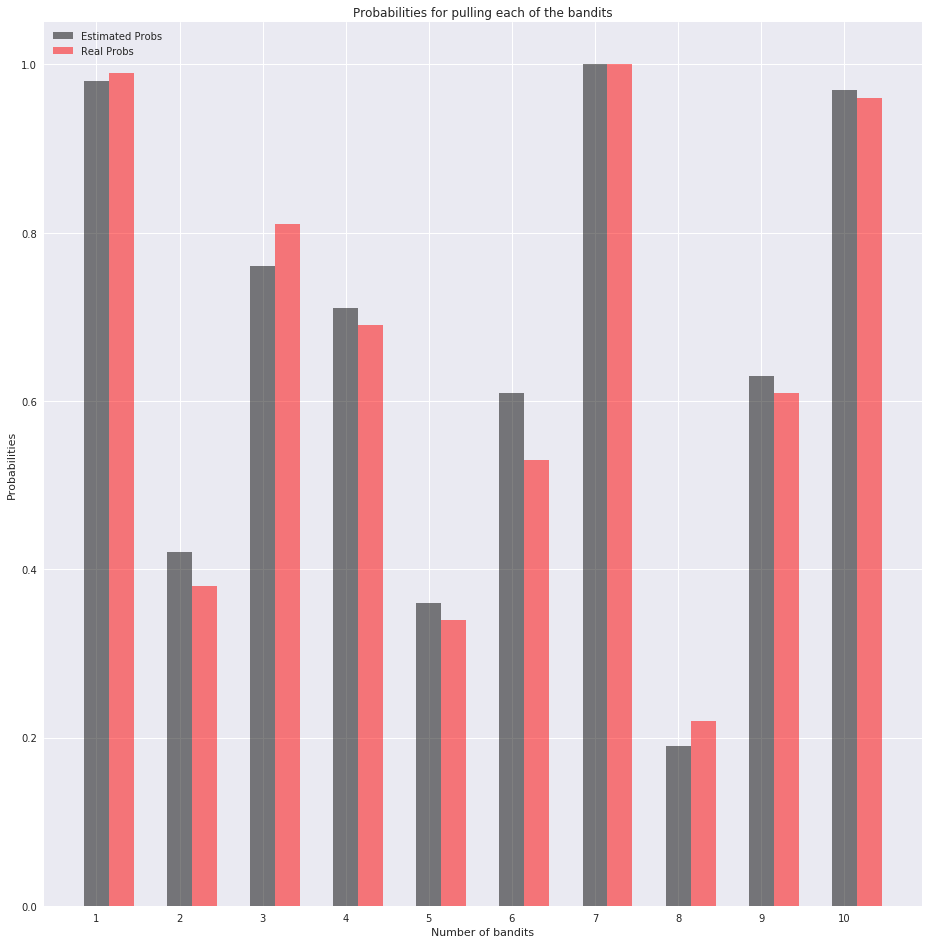

In [57]:
colors = ['b','g']
k_bandits = np.arange(1,11)
#plots the histogram
plt.figure(figsize=(13,13))
plt.bar(k_bandits,expected_reward,color='k',label='Estimated Probs', alpha=0.5,\
        align='center',width=0.3)
plt.bar(k_bandits+0.3,bandit_probs,color='r',label='Real Probs', alpha=0.5,\
        align='center',width=0.3)
# plt.xticks(range(1,num_bandits+1))
plt.xticks(k_bandits)
plt.xlabel('Number of bandits')
plt.ylabel('Probabilities')
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Probabilities for pulling each of the bandits')
plt.show()

4. Repeat parts 2 and 3, but now automate it with code and vary from 10 to 1000 in steps of 10/50 as appropriate. 

   4.1) Report if increasing the value of k makes the problem harder, using several metrics like
   
      1- normalized reward (total reward/k)
      
      2- The number of times the algorithm fails to converge and produces bad results
      
      3- If the algorithm learns sub-optimal policies. 
      
      ** Repeat each instance of using a value of k multiple times, with different probabilities in each run. 

In [11]:
# --------------------- 
#  k-bandit simulation           
# --------------------- 
bad_results = 0
iterations = 0
total_rewards = []
finding_best = []
for k in range(10,1010,10):
# for k in range(50,1050,50):
    # number of bandits
    num_bandits = k
    epsilon = 0.1
    n_episodes = 20000
    n_experiments = 5
    expected_reward = np.zeros(num_bandits)
    print(' #----------------------------------------------------------------------------#')
    print(' Running bandits experiment with {} bandits and agent with epsilon of {}'.format(num_bandits, epsilon))

    reward_history_avg = np.zeros(n_episodes)
    action_history_sum = np.zeros((n_episodes, num_bandits))

    bandit_probs = [ np.round(np.random.rand(),2) for i in range(num_bandits)]

    best_bandit = np.argmax(bandit_probs)+1
#     print(' Probabilities calculated', bandit_probs)
    print(' Best expected bandit is ', best_bandit)

    for ex in range(n_experiments):

        bandit = Bandit(num_bandits,bandit_probs) # Initialize bandits
        agent = Agent(bandit, epsilon) # Initialize agents

        action_history, reward_history, reward_per_bandit = experiment(agent, bandit, n_episodes)

        # Sum up experiment reward 
        reward_history_avg += reward_history
        # print(' Reward history avg: ', reward_history_avg)

        # Sum up action history
        for episodes_idx, (a) in enumerate(action_history): 
            action_history_sum[episodes_idx][a] += 1
    

        expected_reward += np.round(reward_per_bandit/agent.n_actions,2)
    final_expected_reward = expected_reward/n_experiments
    
    # Average reward history over all the episodes for all the experiments
    reward_history_avg /= np.float(n_experiments)
    
    total_rewards.append(sum(reward_history_avg))
#     import pdb; pdb.set_trace()
#     print(' Action of last episode = {}'.format(action_history_sum[-1,:]))

#     print(' Total rewards per bandit = {}'.format(reward_per_bandit))

#     print(' Number of actions activated = {}'.format(agent.n_actions))

#     print(' Expected reward for pulling each arm = {}'.format(expected_reward))
    
    best_found_bandit = np.argmax(final_expected_reward)+1
    
    if best_bandit != best_found_bandit:
        bad_results += 1
        finding_best.append(0)
        print(' I am a bad model, I thought the best bandit was {}'.format(best_found_bandit))
    else:
        print(' I am a descent model, I found that the best bandit is {}'.format(best_found_bandit))
        finding_best.append(1)
    iterations += 1
print(' Master, I have failed {} times out of {} iterations'.format(bad_results, iterations))

 #----------------------------------------------------------------------------#
 Running bandits experiment with 10 bandits and agent with epsilon of 0.1
 Best expected bandit is  3
 I am a descent model, I found that the best bandit is 3
 #----------------------------------------------------------------------------#
 Running bandits experiment with 20 bandits and agent with epsilon of 0.1
 Best expected bandit is  9
 I am a descent model, I found that the best bandit is 9
 #----------------------------------------------------------------------------#
 Running bandits experiment with 30 bandits and agent with epsilon of 0.1
 Best expected bandit is  22
 I am a descent model, I found that the best bandit is 22
 #----------------------------------------------------------------------------#
 Running bandits experiment with 40 bandits and agent with epsilon of 0.1
 Best expected bandit is  34
 I am a descent model, I found that the best bandit is 34
 #--------------------------------------

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


 I am a bad model, I thought the best bandit was 138
 #----------------------------------------------------------------------------#
 Running bandits experiment with 230 bandits and agent with epsilon of 0.1
 Best expected bandit is  22
 I am a bad model, I thought the best bandit was 32
 #----------------------------------------------------------------------------#
 Running bandits experiment with 240 bandits and agent with epsilon of 0.1
 Best expected bandit is  104
 I am a bad model, I thought the best bandit was 88
 #----------------------------------------------------------------------------#
 Running bandits experiment with 250 bandits and agent with epsilon of 0.1
 Best expected bandit is  171
 I am a bad model, I thought the best bandit was 91
 #----------------------------------------------------------------------------#
 Running bandits experiment with 260 bandits and agent with epsilon of 0.1
 Best expected bandit is  42
 I am a bad model, I thought the best bandit was 191


 I am a bad model, I thought the best bandit was 3
 #----------------------------------------------------------------------------#
 Running bandits experiment with 580 bandits and agent with epsilon of 0.1
 Best expected bandit is  1
 I am a bad model, I thought the best bandit was 9
 #----------------------------------------------------------------------------#
 Running bandits experiment with 590 bandits and agent with epsilon of 0.1
 Best expected bandit is  324
 I am a bad model, I thought the best bandit was 3
 #----------------------------------------------------------------------------#
 Running bandits experiment with 600 bandits and agent with epsilon of 0.1
 Best expected bandit is  414
 I am a bad model, I thought the best bandit was 2
 #----------------------------------------------------------------------------#
 Running bandits experiment with 610 bandits and agent with epsilon of 0.1
 Best expected bandit is  66
 I am a bad model, I thought the best bandit was 6
 #------

 I am a bad model, I thought the best bandit was 7
 #----------------------------------------------------------------------------#
 Running bandits experiment with 930 bandits and agent with epsilon of 0.1
 Best expected bandit is  5
 I am a bad model, I thought the best bandit was 1
 #----------------------------------------------------------------------------#
 Running bandits experiment with 940 bandits and agent with epsilon of 0.1
 Best expected bandit is  128
 I am a bad model, I thought the best bandit was 1
 #----------------------------------------------------------------------------#
 Running bandits experiment with 950 bandits and agent with epsilon of 0.1
 Best expected bandit is  286
 I am a bad model, I thought the best bandit was 2
 #----------------------------------------------------------------------------#
 Running bandits experiment with 960 bandits and agent with epsilon of 0.1
 Best expected bandit is  80
 I am a bad model, I thought the best bandit was 1
 #------

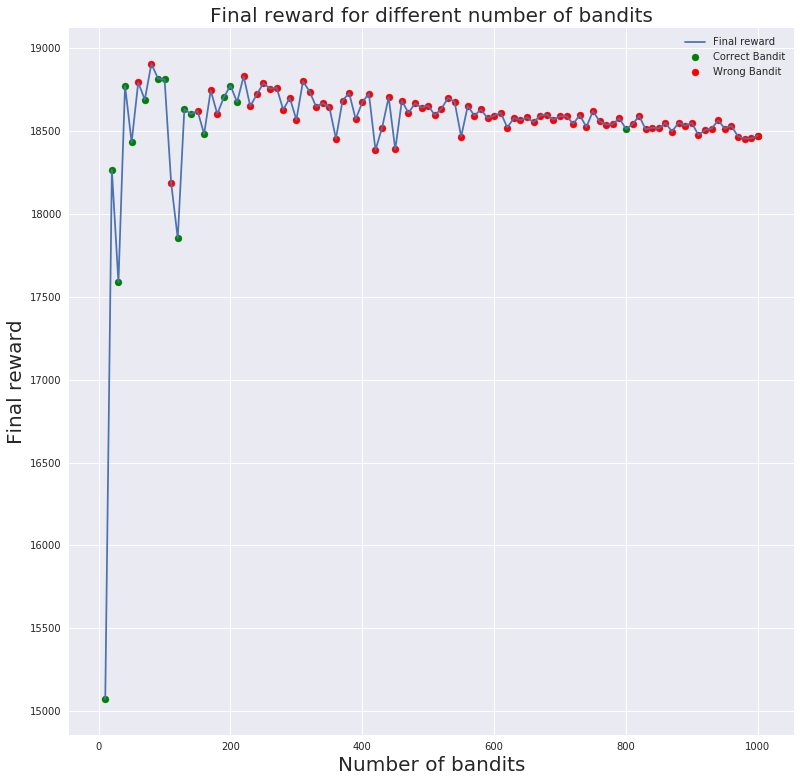

In [58]:
plt.figure(figsize=(13,13))
# k_values = list(range(50,1050,50))
k_values = list(range(10,1010,10))
plt.plot(k_values,total_rewards, label='Final reward')
# plt.plot(list(range(10,1010,10)),total_rewards)
for i in range(len(k_values)-1):
    if finding_best[i] == 1:
        plt.scatter(k_values[i],total_rewards[i], color='g')
    else:
        plt.scatter(k_values[i],total_rewards[i], color='r')
        
plt.scatter(k_values[i+1],total_rewards[i+1], color='g', label='Correct Bandit')
plt.scatter(k_values[i+1],total_rewards[i+1], color='r', label='Wrong Bandit')    
# plt.xticks(k_values)
plt.xlabel('Number of bandits',fontsize=20)
plt.ylabel('Final reward',fontsize=20)
plt.title('Final reward for different number of bandits',fontsize=20)
plt.legend()
plt.grid
plt.show()

Based on the plot that we have provided, it can be appreaciated that it becomes harder for the model to find the best bandit to pull from as the number of bandits increase. The reason behind this is due to the number of episodes remain constant as we increase the number of bandits. So, the model would require more episodes to find the best bandit, when the number of bandits is high.

5. Repeat part 4 but now interleave policy learning for a certain number of iterations and then exploiting that policy during exploration in order to improve the model (Q-learning). 

      1- Does this actually improve the model?
      
      2- Does it lead to premature converge to a sub-optimal policy?. 
      
      3- Compare against part 4. 

In [4]:
def experiment_2(agent, bandit, N_episodes):
        action_history = []
        reward_history = []
        reward_per_bandit = np.zeros(bandit.k, dtype=np.float)
        commander = 0
        for episode in range(N_episodes):
            # Choose action from agent 
            if commander < 50:
                action = agent.choose_action(bandit, True)
    #             print(' Corresponding action: ', action)
                reward = bandit.get_reward(action)
                reward_per_bandit[action] += reward
    #             print(' r: ', reward)
                agent.update_Q(action, reward)
            else:
                if commander < 100:
                    action = agent.choose_action(bandit)
    #             print(' Corresponding action: ', action)
                    reward = bandit.get_reward(action)
                    reward_per_bandit[action] += reward
                else:
                    commander = 0
            commander += 1
            action_history.append(action)
            reward_history.append(reward)
        return np.array(action_history), np.array(reward_history), reward_per_bandit

In [7]:
# --------------------- 
#  k-bandit simulation           
# --------------------- 
bad_results = 0
iterations = 0
total_rewards = []
finding_best = []
epsilon = 0.0
n_episodes = 20000
n_experiments = 5

for k in range(10,1010,10):
# for k in range(50,1050,50):
    # number of bandits
    num_bandits = k
    expected_reward = np.zeros(num_bandits)
    print(' #----------------------------------------------------------------------------#')
    print(' Running bandits experiment with {} bandits and agent with epsilon of {}'.format(num_bandits, epsilon))

    reward_history_avg = np.zeros(n_episodes)
    action_history_sum = np.zeros((n_episodes, num_bandits))

    bandit_probs = [ np.round(np.random.rand(),2) for i in range(num_bandits)]

    best_bandit = np.argmax(bandit_probs)+1
#     print(' Probabilities calculated', bandit_probs)
    print(' Best expected bandit is ', best_bandit)

    for ex in range(n_experiments):

        bandit = Bandit(num_bandits,bandit_probs) # Initialize bandits
        agent = Agent(bandit, epsilon) # Initialize agents

        action_history, reward_history, reward_per_bandit = experiment_2(agent, bandit, n_episodes)

        # Sum up experiment reward 
        reward_history_avg += reward_history
        # print(' Reward history avg: ', reward_history_avg)

        # Sum up action history
        for episodes_idx, (a) in enumerate(action_history): 
            action_history_sum[episodes_idx][a] += 1
    

        expected_reward += np.round(reward_per_bandit/agent.n_actions,2)
    final_expected_reward = expected_reward/n_experiments
    
    # Average reward history over all the episodes for all the experiments
    reward_history_avg /= np.float(n_experiments)
    
    total_rewards.append(sum(reward_history_avg))
#     import pdb; pdb.set_trace()
#     print(' Action of last episode = {}'.format(action_history_sum[-1,:]))

#     print(' Total rewards per bandit = {}'.format(reward_per_bandit))

#     print(' Number of actions activated = {}'.format(agent.n_actions))

#     print(' Expected reward for pulling each arm = {}'.format(expected_reward))
    
    best_found_bandit = np.argmax(final_expected_reward)+1
    
    if best_bandit != best_found_bandit:
        bad_results += 1
        finding_best.append(0)
        print(' I am a bad model, I thought the best bandit was {}'.format(best_found_bandit))
    else:
        print(' I am a descent model, I found that the best bandit is {}'.format(best_found_bandit))
        finding_best.append(1)
    iterations += 1
print(' Master, I have failed {} times out of {} iterations'.format(bad_results, iterations))

 #----------------------------------------------------------------------------#
 Running bandits experiment with 10 bandits and agent with epsilon of 0.0
 Best expected bandit is  2
 I am a bad model, I thought the best bandit was 10
 #----------------------------------------------------------------------------#
 Running bandits experiment with 20 bandits and agent with epsilon of 0.0
 Best expected bandit is  8
 I am a bad model, I thought the best bandit was 17
 #----------------------------------------------------------------------------#
 Running bandits experiment with 30 bandits and agent with epsilon of 0.0
 Best expected bandit is  14
 I am a descent model, I found that the best bandit is 14
 #----------------------------------------------------------------------------#
 Running bandits experiment with 40 bandits and agent with epsilon of 0.0
 Best expected bandit is  23
 I am a descent model, I found that the best bandit is 23
 #------------------------------------------------

 I am a bad model, I thought the best bandit was 313
 #----------------------------------------------------------------------------#
 Running bandits experiment with 360 bandits and agent with epsilon of 0.0
 Best expected bandit is  33
 I am a descent model, I found that the best bandit is 33
 #----------------------------------------------------------------------------#
 Running bandits experiment with 370 bandits and agent with epsilon of 0.0
 Best expected bandit is  28
 I am a bad model, I thought the best bandit was 139
 #----------------------------------------------------------------------------#
 Running bandits experiment with 380 bandits and agent with epsilon of 0.0
 Best expected bandit is  96
 I am a bad model, I thought the best bandit was 371
 #----------------------------------------------------------------------------#
 Running bandits experiment with 390 bandits and agent with epsilon of 0.0
 Best expected bandit is  38
 I am a descent model, I found that the best ba

 I am a bad model, I thought the best bandit was 470
 #----------------------------------------------------------------------------#
 Running bandits experiment with 710 bandits and agent with epsilon of 0.0
 Best expected bandit is  92
 I am a bad model, I thought the best bandit was 621
 #----------------------------------------------------------------------------#
 Running bandits experiment with 720 bandits and agent with epsilon of 0.0
 Best expected bandit is  39
 I am a bad model, I thought the best bandit was 310
 #----------------------------------------------------------------------------#
 Running bandits experiment with 730 bandits and agent with epsilon of 0.0
 Best expected bandit is  17
 I am a bad model, I thought the best bandit was 91
 #----------------------------------------------------------------------------#
 Running bandits experiment with 740 bandits and agent with epsilon of 0.0
 Best expected bandit is  12
 I am a bad model, I thought the best bandit was 270


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


 I am a bad model, I thought the best bandit was 7
 #----------------------------------------------------------------------------#
 Running bandits experiment with 910 bandits and agent with epsilon of 0.0
 Best expected bandit is  46
 I am a bad model, I thought the best bandit was 751
 #----------------------------------------------------------------------------#
 Running bandits experiment with 920 bandits and agent with epsilon of 0.0
 Best expected bandit is  173
 I am a bad model, I thought the best bandit was 373
 #----------------------------------------------------------------------------#
 Running bandits experiment with 930 bandits and agent with epsilon of 0.0
 Best expected bandit is  222
 I am a bad model, I thought the best bandit was 353
 #----------------------------------------------------------------------------#
 Running bandits experiment with 940 bandits and agent with epsilon of 0.0
 Best expected bandit is  585
 I am a bad model, I thought the best bandit was 38

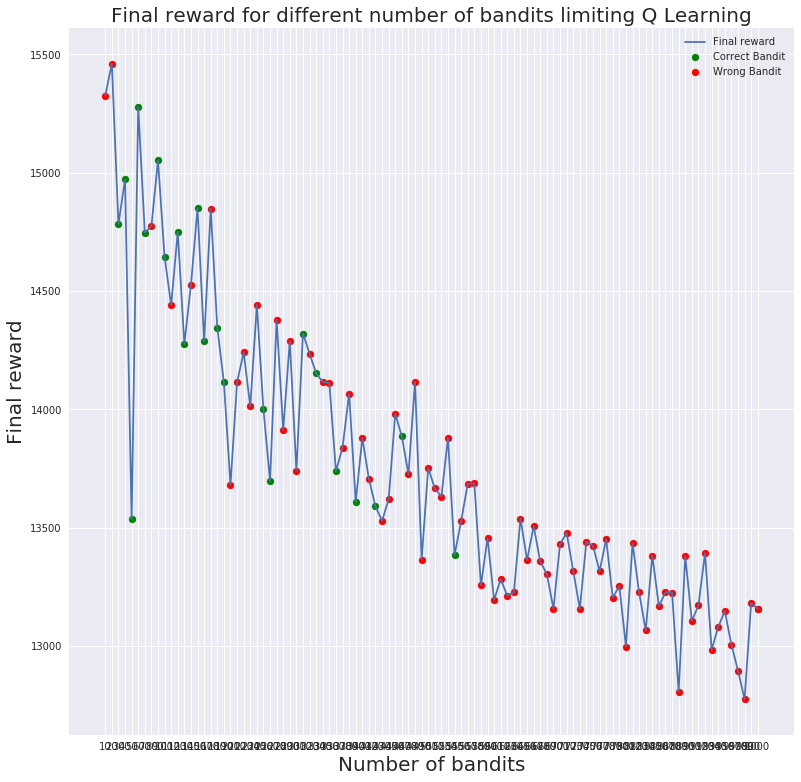

In [8]:
plt.figure(figsize=(13,13))
# k_values = list(range(50,1050,50))
k_values = list(range(10,1010,10))
plt.plot(k_values,total_rewards, label='Final reward')
# plt.plot(list(range(10,1010,10)),total_rewards)
for i in range(len(k_values)-1):
    if finding_best[i] == 1:
        plt.scatter(k_values[i],total_rewards[i], color='g')
    else:
        plt.scatter(k_values[i],total_rewards[i], color='r')
        
plt.scatter(k_values[i+1],total_rewards[i+1], color='g', label='Correct Bandit')
plt.scatter(k_values[i+1],total_rewards[i+1], color='r', label='Wrong Bandit')    
# plt.xticks(k_values)
plt.xlabel('Number of bandits',fontsize=20)
plt.ylabel('Final reward',fontsize=20)
plt.title('Final reward for different number of bandits limiting Q Learning',fontsize=20)
plt.legend()
plt.grid
plt.show()

In [47]:
# #------------------------------
# # Plot reward history
# #------------------------------
# plt.figure(figsize=(18, 12))
# plt.plot(reward_history_avg)
# plt.xlabel('Episode number')
# plt.ylabel('Rewards collected'.format(n_experiments))
# plt.title('Bandit reward history averaged over {} experiments(epsilon = {})'.format(n_experiments, epsilon))
# ax = plt.gca()
# ax.set_xscale('log', nonposx='clip')
# plt.xlim([1, n_episodes])
# plt.show()

# # =========================
# # Plot action history results
# # =========================
# plt.figure(figsize=(18, 12))
# for i in range(num_bandits):
#     action_history_sum_plot = 100 * action_history_sum[:,i] / n_experiments
#     plt.plot(list(np.array(range(len(action_history_sum_plot)))+1),
#                  action_history_sum_plot,
#                  linewidth=5.0,
#                  label="Bandit #{}".format(i+1))
# plt.title("Bandit action history averaged over {} experiments (epsilon = {})".format(n_experiments, epsilon), fontsize=26)
# plt.xlabel("Episode Number", fontsize=26)
# plt.ylabel("Bandit Action Choices (%)", fontsize=26)
# leg = plt.legend(loc='upper left', shadow=True, fontsize=26)
# ax = plt.gca()
# ax.set_xscale("log", nonposx='clip')
# plt.xlim([1, n_episodes])
# plt.ylim([0, 100])
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# for legobj in leg.legendHandles:
#     legobj.set_linewidth(16.0)
# plt.show()
